# CSMODEL MCO Jupyter Notebook
Akbayan Partylist: **Encarguez**, Jorenie T. | **Filipino**, Audric Justin P. | **Sy**, Vaughn Marick A. | **Valdez**, Pulvert Gerald 

# Data Set Description
This data set contains student performance in secondary education in two Portuguese schools. The two datasets regarding performances are Mathematics and Portuguese and it was collected through school reports and questionnaires. Due to the data collection method, insights from the data can be affected by limited generability and self-reported bias.

There are a total of **`1044`** observations across the two datasets, there are **`395`** observations on **`Maths.csv`** and **`649`** observations on **`Portuguese.csv`** across 33 variables.

- **`school`**:	student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- **`sex`**:	student's sex (binary: 'F' - female or 'M' - male)
- **`age`**:	student's age (numeric: from 15 to 22)
- **`address`**:	student's home address type (binary: 'U' - urban or 'R' - rural)
- **`famsize`**:	family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- **`Pstatus`**:	parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- **`Medu`**:	mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **`Fedu`**:	father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **`Mjob`**:	mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **`Fjob`**:	father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **`reason`**:	reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **`guardian`**:	student's guardian (nominal: 'mother', 'father' or 'other')
- **`traveltime`**:	home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **`studytime`**:	weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **`failures`**:	number of past class failures (numeric: n if 1<=n<3, else 4)
- **`schoolsup`**:	extra educational support (binary: yes or no)
- **`famsup`**:	family educational support (binary: yes or no)
- **`paid`**:	extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **`activities`**:	extra-curricular activities (binary: yes or no)
- **`nursery`**:	attended nursery school (binary: yes or no)
- **`higher`**:	wants to take higher education (binary: yes or no)
- **`internet`**:	Internet access at home (binary: yes or no)
- **`romantic`**:	with a romantic relationship (binary: yes or no)
- **`famrel`**:	quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **`freetime`**:	free time after school (numeric: from 1 - very low to 5 - very high)
- **`goout`**:	going out with friends (numeric: from 1 - very low to 5 - very high)
- **`Dalc`**:	workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **`Walc`**:	weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **`health`**:	current health status (numeric: from 1 - very bad to 5 - very good)
- **`absences`**:	number of school absences (numeric: from 0 to 93)
- **`G1`**:	first period grade (numeric: from 0 to 20)
- **`G2`**:	second period grade (numeric: from 0 to 20)
- **`G3`**:	final grade (numeric: from 0 to 20, output target)

-- **`G1`**, **`G2`**, and **`G3`** are grades of the student over a school year.

Another column is added depending on the origin of the dataframe which brings it to 34 variables on the merged dataframe. 
- **`subject`**: subject of the dataframe (binary: maths or portuguese)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats 

sns.set_theme(style="darkgrid")
%matplotlib inline

# Data Cleaning

First, we load and show the head's of the datasets to gain an insight on the structure.

In [2]:
maths_df = pd.read_csv('Maths.csv')
maths_df.info()
maths_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
portu_df = pd.read_csv('Portuguese.csv')
portu_df.info()
portu_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Since we are analysing the entirety of the student population, it is ideal to be able to track which dataframe did the row come from when it is eventually merged.

In [4]:
maths_df['subject'] = 'maths'
portu_df['subject'] = 'portuguese'

Upon initial inspection of **`Maths.csv`** and **`Portuguese.csv`**, the data appears to be consistently and properly represented. However,  it's important to perform due diligence to catch any issues that may not be immediately visible.

In [5]:
expected_values = {
    'school': {'gp', 'ms'},
    'sex': {'f', 'm'},
    'address': {'u', 'r'},
    'famsize': {'le3', 'gt3'},
    'pstatus': {'t', 'a'},
    'medu': set(range(0, 5)),
    'fedu': set(range(0, 5)),
    'mjob': {'teacher', 'health', 'services', 'at_home', 'other'},
    'fjob': {'teacher', 'health', 'services', 'at_home', 'other'},
    'reason': {'home', 'reputation', 'course', 'other'},
    'guardian': {'mother', 'father', 'other'},
    'traveltime': set(range(1, 5)),
    'studytime': set(range(1, 5)),
    'failures': {0, 1, 2, 4},
    'schoolsup': {'yes', 'no'},
    'famsup': {'yes', 'no'},
    'paid': {'yes', 'no'},
    'activities': {'yes', 'no'},
    'nursery': {'yes', 'no'},
    'higher': {'yes', 'no'},
    'internet': {'yes', 'no'},
    'romantic': {'yes', 'no'},
    'famrel': set(range(1, 6)),
    'freetime': set(range(1, 6)),
    'goout': set(range(1, 6)),
    'dalc': set(range(1, 6)),
    'walc': set(range(1, 6)),
    'health': set(range(1, 6)),
    'absences': set(range(0, 94)),
    'g1': set(range(0, 21)),
    'g2': set(range(0, 21)),
    'g3': set(range(0, 21)),
    'subject': {'maths', 'portuguese'}
}

def clean_strings(df):
    for col in df.select_dtypes(include='object'):
        df[col] = df[col].str.strip().str.lower()
    return df

def clean_numeric(df):
    numeric_cols = [
        'age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
        'famrel', 'freetime', 'goout', 'dalc', 'walc', 'health',
        'absences', 'g1', 'g2', 'g3'
    ]
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

def check_values(df):
    invalid_values = {}
    for col, valid_set in expected_values.items():
        if col in df.columns:
            invalid = set(df[col].dropna().unique()) - valid_set
            if invalid:
                invalid_values[col] = invalid
    return invalid_values

In the code above, multiple data representation and correct values is being tested and checked, while further cleaning after if necessary.

In [6]:
maths_df = clean_strings(maths_df)
maths_df = clean_numeric(maths_df)

portu_df = clean_strings(portu_df)
portu_df = clean_numeric(portu_df)

maths_invalid = check_values(maths_df)
portu_invalid = check_values(portu_df)

if maths_invalid:
    print("Invalid values in math dataset:", maths_invalid)
else:
    print("Math dataset is clean.")

if portu_invalid:
    print("Invalid values in portuguese dataset:", portu_invalid)
else:
    print("Portuguese dataset is clean.")

Invalid values in math dataset: {'failures': {np.int64(3)}}
Invalid values in portuguese dataset: {'failures': {np.int64(3)}}


As seen above, there are incorrect values. Based on the attribute description, "**`failures`**:	number of past class failures (numeric: n if 1<=n<3, else 4)", 0 and 3 should never appear as a value. We shall clean that in two ways, the 0 shall be an allowed value as a student can realistically have no past failures and 3 shall be converted to 4. We shall then run the cleaner again to ensure that the categorical and numerical values are as intended.

In [7]:
maths_df['failures'] = maths_df['failures'].apply(lambda x: x if x in [0, 1, 2] else 4)
portu_df['failures'] = portu_df['failures'].apply(lambda x: x if x in [0, 1, 2] else 4)

In [8]:
maths_invalid = check_values(maths_df)
portu_invalid = check_values(portu_df)

if maths_invalid:
    print("Invalid values in math dataset:", maths_invalid)
else:
    print("Math dataset is clean.")

if portu_invalid:
    print("Invalid values in portuguese dataset:", portu_invalid)
else:
    print("Portuguese dataset is clean.")

Math dataset is clean.
Portuguese dataset is clean.


Next is to check the columnns of the two csv files if their attribute names are matching.

In [9]:
def check_column_names(df, df_name="DataFrame"):
    bad_columns = [col for col in df.columns if col != col.strip()]
    if bad_columns:
        print(f"{df_name} has improperly formatted column names: {bad_columns}")
    else:
        print(f"All column names in {df_name} are clean.")

check_column_names(maths_df, "Math Dataset")
check_column_names(portu_df, "Portuguese Dataset")


All column names in Math Dataset are clean.
All column names in Portuguese Dataset are clean.


We will now check incorrect data types. We expect 16 integer data types and 17 object data types from the info checked from the csv above.

In [10]:
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
                'absences', 'G1', 'G2', 'G3']

def check_numeric_as_string(df, numeric_cols):
    weird_numbers = {}
    for col in numeric_cols:
        non_numeric_type = df[col].apply(lambda x: isinstance(x, str))
        if non_numeric_type.any():
            weird_numbers[col] = df[col][non_numeric_type].unique().tolist()
    return weird_numbers

maths_check_string = check_numeric_as_string(maths_df, numeric_cols)
portu_check_string = check_numeric_as_string(portu_df, numeric_cols)

print("Numbers written as strings in Maths dataset:", maths_check_string)
print("Numbers written as strings in Portuguese dataset:", portu_check_string)

Numbers written as strings in Maths dataset: {}
Numbers written as strings in Portuguese dataset: {}


As seen above, no numbers above are written as strings. Next is to check if there are any missing values that may exist in our dataframes. 

In [11]:
def check_missing_values(df):
    missing = df.isna().sum()
    missing = missing[missing > 0]
    if missing.empty:
        print("No missing values detected.")
    else:
        print("Missing values found in columns:")
        print(missing)

check_missing_values(maths_df)
check_missing_values(portu_df)

No missing values detected.
No missing values detected.


As seen above, no missing values from the columns across our dataframes. Next is to check if there are duplicate instances of data in our dataframes.

In [12]:
maths_duplicates = maths_df[maths_df.duplicated(keep=False)]
portu_duplicates = portu_df[portu_df.duplicated(keep=False)]

print(f"Number of duplicate rows in maths dataframe: {len(maths_duplicates)}")
print(maths_duplicates)
print(f"Number of duplicate rows in portuguese dataframe: {len(portu_duplicates)}")
print(portu_duplicates)

Number of duplicate rows in maths dataframe: 0
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3, subject]
Index: []

[0 rows x 34 columns]
Number of duplicate rows in portuguese dataframe: 0
Empty DataFrame
Columns: [school, sex, age, address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic, famrel, freetime, goout, Dalc, Walc, health, absences, G1, G2, G3, subject]
Index: []

[0 rows x 34 columns]


It was entirely possible for there to have been duplicate data. There is no unique identifier for the record instances but after checking it was found that there are no duplicate instances, therefore it can be concluded that every record is a distinct student. Next, we will check for outliers in our dataframes. First we'll check numerical outliers then categorical outliers.

We will be using box plots for our numeric outliers. Exploratory Data Analysis will be done in this notebook so a visual using a box plot for the outlier would be useful.

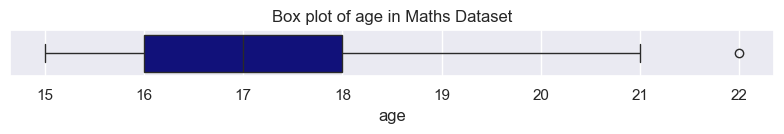

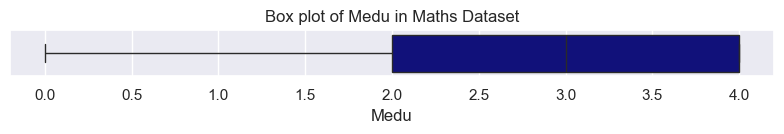

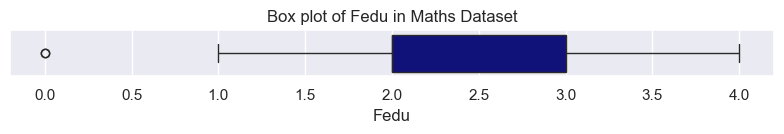

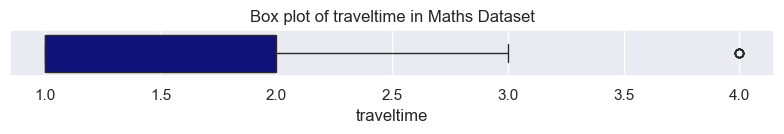

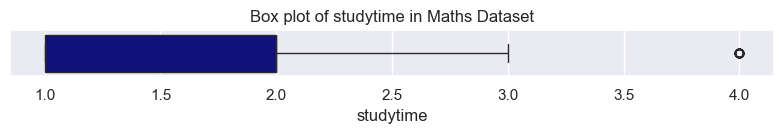

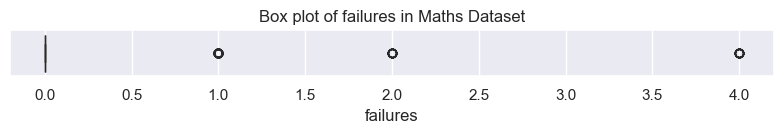

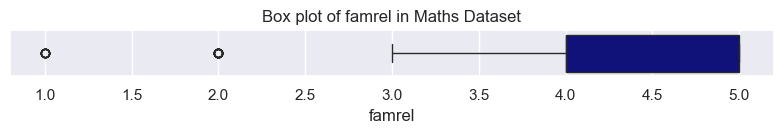

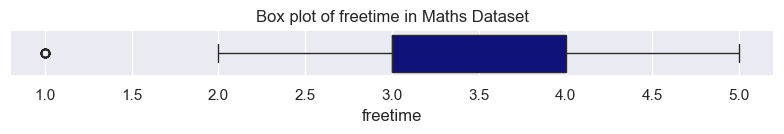

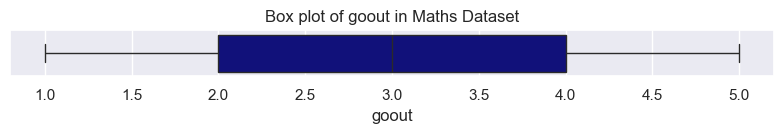

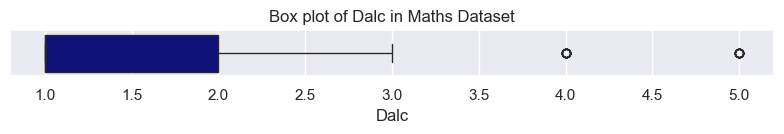

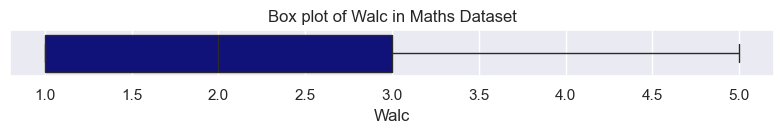

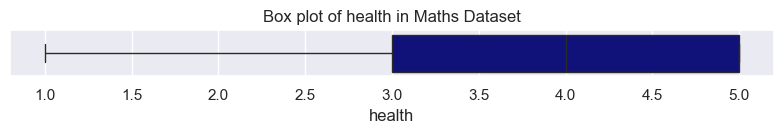

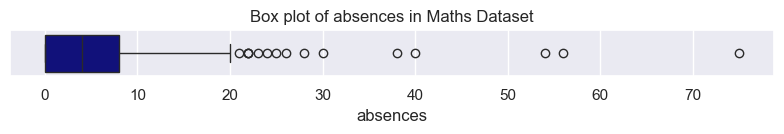

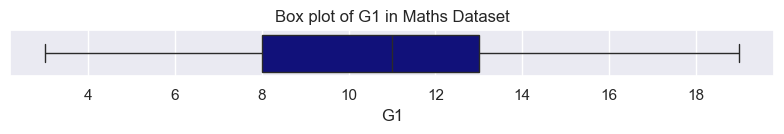

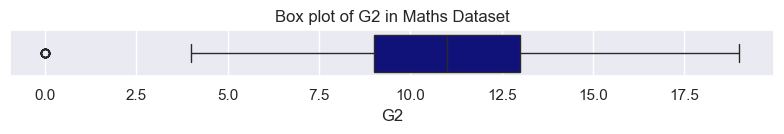

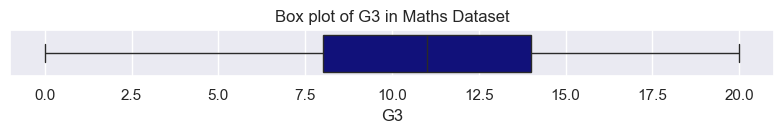

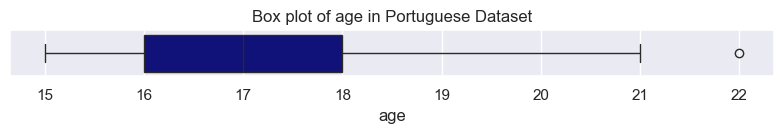

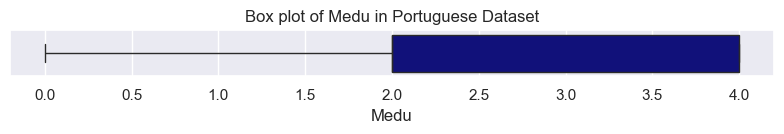

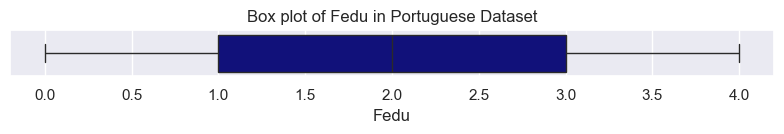

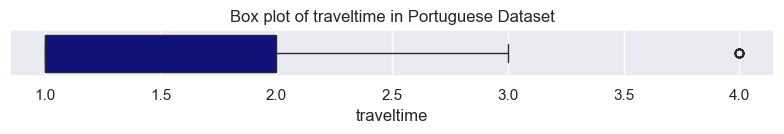

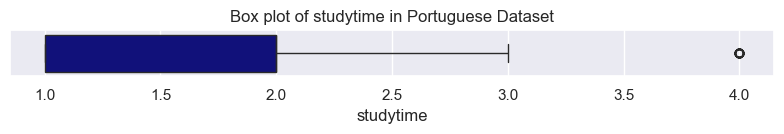

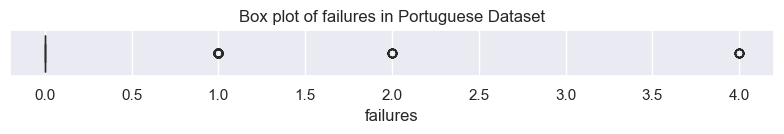

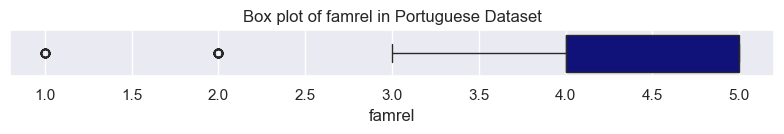

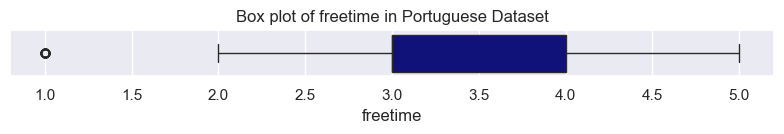

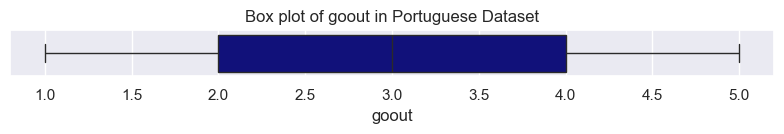

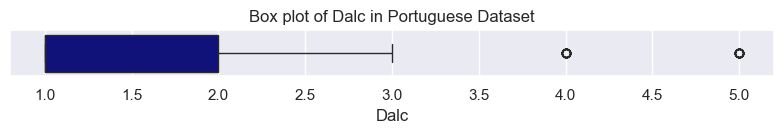

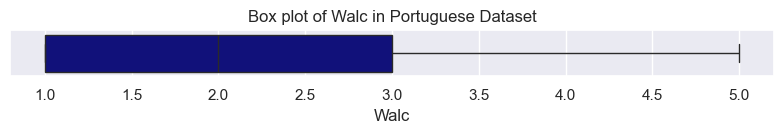

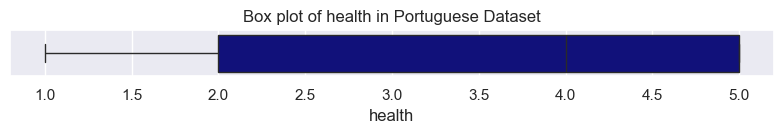

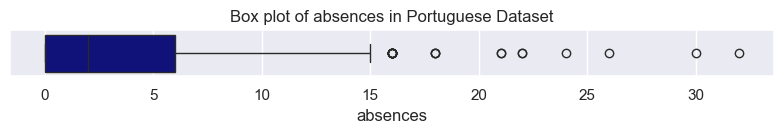

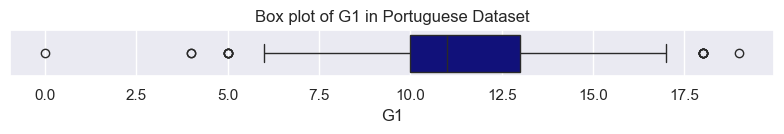

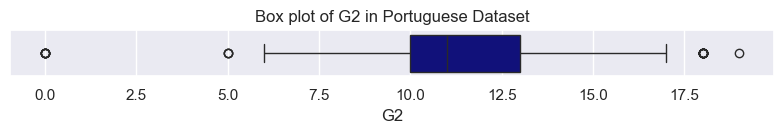

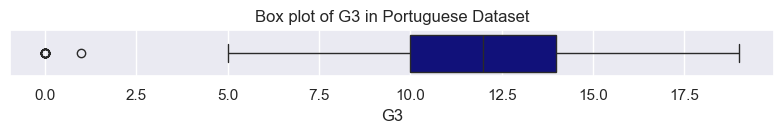

In [13]:
def plot_boxplots(df, numeric_cols, dataset_name="Dataset"):
    for col in numeric_cols:
        if col in df.columns:
            plt.figure(figsize=(8, 1.5))
            sns.boxplot(data=df, x=col, color='darkblue')
            plt.title(f"Box plot of {col} in {dataset_name}", )
            plt.tight_layout()
            plt.show()

plot_boxplots(maths_df, numeric_cols, dataset_name="Maths Dataset")
plot_boxplots(portu_df, numeric_cols, dataset_name="Portuguese Dataset")

Below is the frequency check for the categorical outliers. We're using a table in order to have a better idea on the frequency of our data.

In [14]:
def categorical_frequency_table(df, dataset_name="Dataset"):
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        freq_table = df[col].value_counts(dropna=False).reset_index()
        freq_table.columns = [col, 'count']
        print(f"Frequency table for '{col}' in {dataset_name}:")
        display(freq_table)
        print("-" * 40)

categorical_frequency_table(maths_df, dataset_name="Maths Dataset")
categorical_frequency_table(portu_df, dataset_name="Portuguese Dataset")


Frequency table for 'school' in Maths Dataset:


,school,count
0,gp,349
1,ms,46


----------------------------------------
Frequency table for 'sex' in Maths Dataset:


,sex,count
0,f,208
1,m,187


----------------------------------------
Frequency table for 'address' in Maths Dataset:


,address,count
0,u,307
1,r,88


----------------------------------------
Frequency table for 'famsize' in Maths Dataset:


,famsize,count
0,gt3,281
1,le3,114


----------------------------------------
Frequency table for 'Pstatus' in Maths Dataset:


,Pstatus,count
0,t,354
1,a,41


----------------------------------------
Frequency table for 'Mjob' in Maths Dataset:


,Mjob,count
0,other,141
1,services,103
2,at_home,59
3,teacher,58
4,health,34


----------------------------------------
Frequency table for 'Fjob' in Maths Dataset:


,Fjob,count
0,other,217
1,services,111
2,teacher,29
3,at_home,20
4,health,18


----------------------------------------
Frequency table for 'reason' in Maths Dataset:


,reason,count
0,course,145
1,home,109
2,reputation,105
3,other,36


----------------------------------------
Frequency table for 'guardian' in Maths Dataset:


,guardian,count
0,mother,273
1,father,90
2,other,32


----------------------------------------
Frequency table for 'schoolsup' in Maths Dataset:


,schoolsup,count
0,no,344
1,yes,51


----------------------------------------
Frequency table for 'famsup' in Maths Dataset:


,famsup,count
0,yes,242
1,no,153


----------------------------------------
Frequency table for 'paid' in Maths Dataset:


,paid,count
0,no,214
1,yes,181


----------------------------------------
Frequency table for 'activities' in Maths Dataset:


,activities,count
0,yes,201
1,no,194


----------------------------------------
Frequency table for 'nursery' in Maths Dataset:


,nursery,count
0,yes,314
1,no,81


----------------------------------------
Frequency table for 'higher' in Maths Dataset:


,higher,count
0,yes,375
1,no,20


----------------------------------------
Frequency table for 'internet' in Maths Dataset:


,internet,count
0,yes,329
1,no,66


----------------------------------------
Frequency table for 'romantic' in Maths Dataset:


,romantic,count
0,no,263
1,yes,132


----------------------------------------
Frequency table for 'subject' in Maths Dataset:


,subject,count
0,maths,395


----------------------------------------
Frequency table for 'school' in Portuguese Dataset:


,school,count
0,gp,423
1,ms,226


----------------------------------------
Frequency table for 'sex' in Portuguese Dataset:


,sex,count
0,f,383
1,m,266


----------------------------------------
Frequency table for 'address' in Portuguese Dataset:


,address,count
0,u,452
1,r,197


----------------------------------------
Frequency table for 'famsize' in Portuguese Dataset:


,famsize,count
0,gt3,457
1,le3,192


----------------------------------------
Frequency table for 'Pstatus' in Portuguese Dataset:


,Pstatus,count
0,t,569
1,a,80


----------------------------------------
Frequency table for 'Mjob' in Portuguese Dataset:


,Mjob,count
0,other,258
1,services,136
2,at_home,135
3,teacher,72
4,health,48


----------------------------------------
Frequency table for 'Fjob' in Portuguese Dataset:


,Fjob,count
0,other,367
1,services,181
2,at_home,42
3,teacher,36
4,health,23


----------------------------------------
Frequency table for 'reason' in Portuguese Dataset:


,reason,count
0,course,285
1,home,149
2,reputation,143
3,other,72


----------------------------------------
Frequency table for 'guardian' in Portuguese Dataset:


,guardian,count
0,mother,455
1,father,153
2,other,41


----------------------------------------
Frequency table for 'schoolsup' in Portuguese Dataset:


,schoolsup,count
0,no,581
1,yes,68


----------------------------------------
Frequency table for 'famsup' in Portuguese Dataset:


,famsup,count
0,yes,398
1,no,251


----------------------------------------
Frequency table for 'paid' in Portuguese Dataset:


,paid,count
0,no,610
1,yes,39


----------------------------------------
Frequency table for 'activities' in Portuguese Dataset:


,activities,count
0,no,334
1,yes,315


----------------------------------------
Frequency table for 'nursery' in Portuguese Dataset:


,nursery,count
0,yes,521
1,no,128


----------------------------------------
Frequency table for 'higher' in Portuguese Dataset:


,higher,count
0,yes,580
1,no,69


----------------------------------------
Frequency table for 'internet' in Portuguese Dataset:


,internet,count
0,yes,498
1,no,151


----------------------------------------
Frequency table for 'romantic' in Portuguese Dataset:


,romantic,count
0,no,410
1,yes,239


----------------------------------------
Frequency table for 'subject' in Portuguese Dataset:


,subject,count
0,portuguese,649


----------------------------------------


There are a few observations made after the box plots and frequency tables. There are a bunch of outliers in attributes failures, famrel, freetime, Dalc, absences, G1, G2, and G3. These values may indicate that it is possible that there is a relationship to be explored for our Exploratory Data Analysis portion. Meanwhile, there seems to be no extreme case of rarity on the frequency tables. 

After all theses operations on the dataframes, it is time to merge our data for the next step.

In [15]:
combined_df = pd.concat([maths_df, portu_df], ignore_index=True)
combined_df.info()
combined_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,gp,f,18,u,gt3,a,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,maths
1,gp,f,17,u,gt3,t,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,maths
2,gp,f,15,u,le3,t,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,maths
3,gp,f,15,u,gt3,t,4,2,health,services,...,2,2,1,1,5,2,15,14,15,maths
4,gp,f,16,u,gt3,t,3,3,other,other,...,3,2,1,2,5,4,6,10,10,maths


# Research Questions & Exploratory Data Analysis

## General Research Question
### - How do academic, behavioral, and socioeconomic factors influence alcohol consumption?

The title of our dataset is "**`Alcohol Effects on Study`**", instead of building on the title and focusing on the effects of alcohol on academic performance, we switch the perspective by exploring if certain factors that are seen in this dataset influence the alcohol consumption of the students. This leads to our general research question, "**`How do academic, behavioral, and socioeconomic factors influence alcohol consumption?`**".

## Exploratory Data Analysis
Now that we have established our general research question, it is time to take into a better look into our dataset. It will be done by exploring the distributions of key variables, identifying patterns or trends, and forming specific subquestions that guide our analysis.

### Subquestions:
1. Does poorer academic performance relate to alcohol use?
2. Do students with more non-academic activities drink more?
3. Does family background relate to alcohol?

### Subquestion 1: Does poorer academic performance relate to alcohol use?

We will be using multiple tests to examine if there is a linear relationship between variables related to academic performance and alcohol consumption.

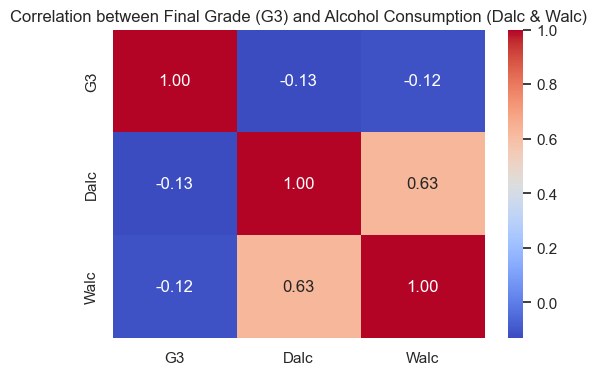

In [16]:
corr_vars = ['G3', 'Dalc', 'Walc']
corr_matrix = combined_df[corr_vars].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Final Grade (G3) and Alcohol Consumption (Dalc & Walc)")
plt.show()

From the results on the heatmap above, it shows weak negative correlations between alcohol use and final academic performance. It could suggest a slight tendency where students consume more alcohol have lower grades, the relationship however seems weak. 

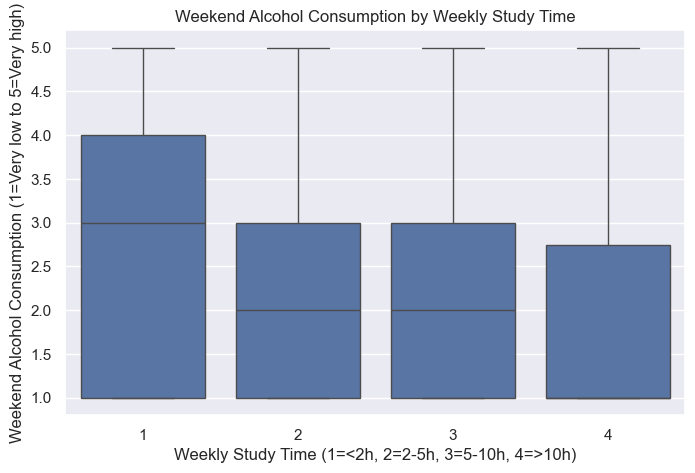

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x='studytime', y='Walc', data=combined_df)
plt.xlabel("Weekly Study Time (1=<2h, 2=2-5h, 3=5-10h, 4=>10h)")
plt.ylabel("Weekend Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Weekend Alcohol Consumption by Weekly Study Time")
plt.show()

From the results of the boxplot above, both the lower and upper whiskers are on values 1 and 5 respectively. The medians however, decrease with values 1-3 as the study time increases. The results suggest an inverse relationship between weekly study time and weekend alcohol consumption as when there is lower alcohol consumption as study time increases, conversely, alcohol consumption tends to increase as study time decreases. 

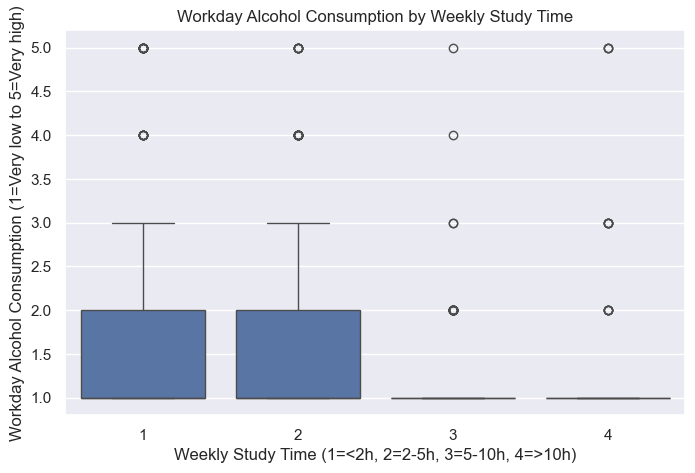

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='studytime', y='Dalc', data=combined_df)
plt.xlabel("Weekly Study Time (1=<2h, 2=2-5h, 3=5-10h, 4=>10h)")
plt.ylabel("Workday Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Workday Alcohol Consumption by Weekly Study Time")
plt.show()

From the results of the boxplot above, the upper whiskers of the students who study less are at 3 while the students who study more are at 1. The medians across the study times however are all at 1. There is a decent amount of outliers across all study times but there is a considerable amount for those who study less. The results suggest an inverse relationship between weekly study time and weekend alcohol consumption as when there is lower alcohol consumption as study time increases, conversely, alcohol consumption tends to increase as study time decreases. 

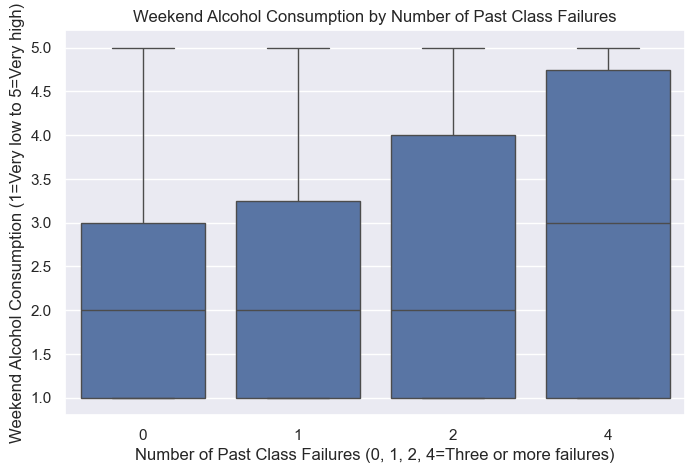

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='failures', y='Walc', data=combined_df)
plt.xlabel("Number of Past Class Failures (0, 1, 2, 4=Three or more failures)")
plt.ylabel("Weekend Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Weekend Alcohol Consumption by Number of Past Class Failures")
plt.show()

From the results of the boxplot above, both the lower and upper whiskers are on values 1 and 5 respectively. The medians are generally at 2 with more failures at 3. The height of the quartiles, increase as the number of failures increase. The results suggest a direct relationship with the number of past class failures and the weekend alcohol consumption.

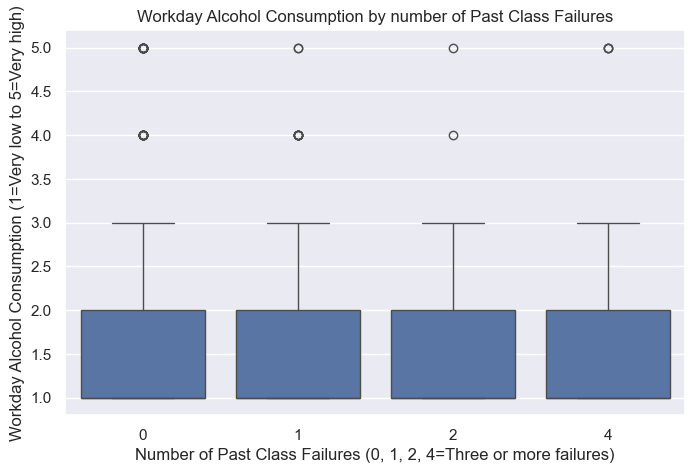

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='failures', y='Dalc', data=combined_df)
plt.xlabel("Number of Past Class Failures (0, 1, 2, 4=Three or more failures)")
plt.ylabel("Workday Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Workday Alcohol Consumption by number of Past Class Failures")
plt.show()

From the results of the boxplot above, both the lower and upper whiskers are at 1 and 3 with the median being consistently at 1. Despite the presence of outliers in areas of higher alcohol consumption, the results suggest that there is no strong relationship between the number of past class failures and workday alcohol consumption.

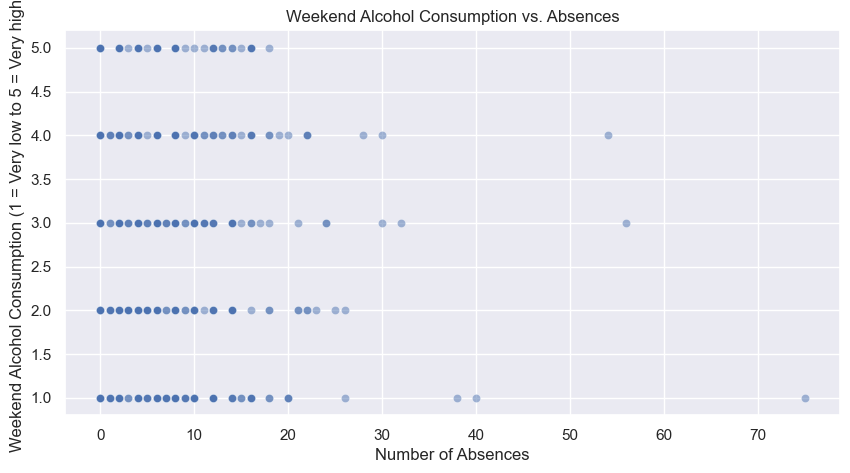

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='absences', y='Walc', data=combined_df, alpha=0.5)
plt.title("Weekend Alcohol Consumption vs. Absences")
plt.xlabel("Number of Absences")
plt.ylabel("Weekend Alcohol Consumption (1 = Very low to 5 = Very high)")
plt.show()


From the results of the scatterplot above, the points are relatively equally spread across all number of absences and weekend alcohol consumption. Very few people who have very high absences have either low or high alcohol consumption. The results suggest that there is no strong relationship between the number of absences and the weekend alcohol consumption.

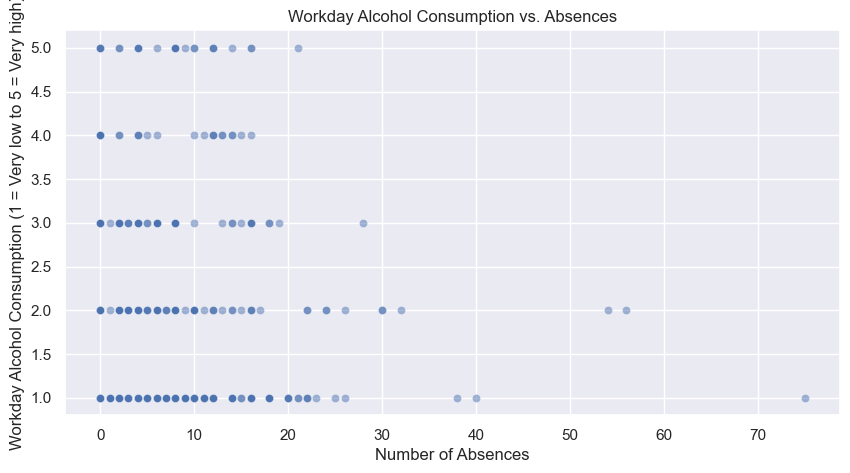

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='absences', y='Dalc', data=combined_df, alpha=0.5)
plt.title("Workday Alcohol Consumption vs. Absences")
plt.xlabel("Number of Absences")
plt.ylabel("Workday Alcohol Consumption (1 = Very low to 5 = Very high)")
plt.show()


From the results of the scatterplot above, the points are relatively equally spread across all number of absences and wokrkday alcohol consumption. Very few people who have very high absences have either low or high alcohol consumption. The results suggest that there is no strong relationship between the number of absences and the workday alcohol consumption.

### Subquestion 2: Do students with more non-academic activities drink more? 
We will be using multiple tests to examine if there is a linear relationship between variables related to non-academic activities and alcohol consumption.

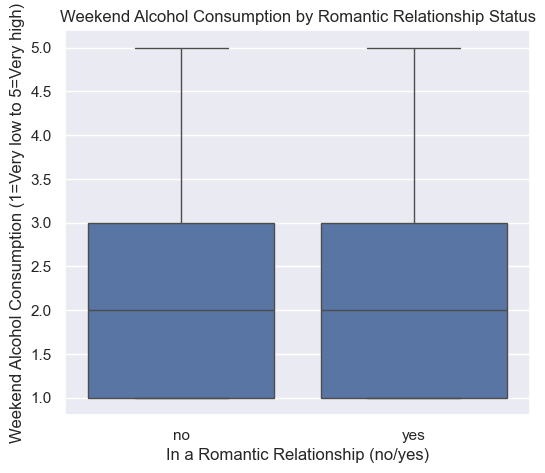

In [23]:
plt.figure(figsize=(6,5))
sns.boxplot(x='romantic', y='Walc', data=combined_df)
plt.xlabel("In a Romantic Relationship (no/yes)")
plt.ylabel("Weekend Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Weekend Alcohol Consumption by Romantic Relationship Status")
plt.show()

From the results of the boxplot above, both groups display exactly the same distributions. The lower and upper whiskers are at 1 and 5 respectively, the median is at 2, the first quartile is at 1, and the third quartile is at 3. The results suggest that there is no influence from being in a romantic relationship on weekend alcohol consumption. 

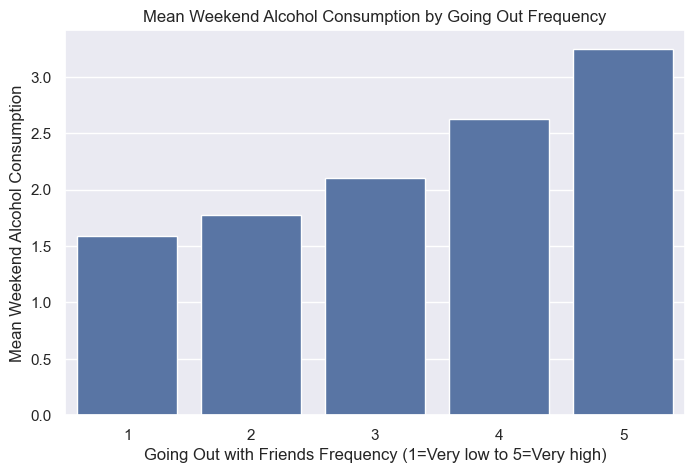

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x='goout', y='Walc', data=combined_df, errorbar=None)
plt.xlabel("Going Out with Friends Frequency (1=Very low to 5=Very high)")
plt.ylabel("Mean Weekend Alcohol Consumption")
plt.title("Mean Weekend Alcohol Consumption by Going Out Frequency")
plt.show()

From the results of the barplot above, it can be observed that as students go out more, the mean alcohol consumption increases as well, suggesting a direct relationship between the two variables. However, the means only ranges from slightly above 1.5 to just above 3.0, suggesting moderate consumption levels over all.

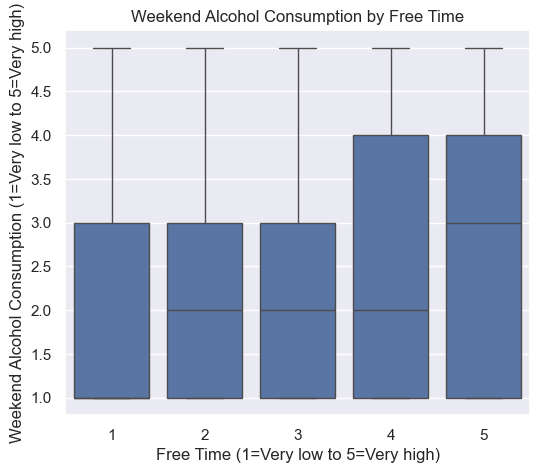

In [25]:
plt.figure(figsize=(6,5))
sns.boxplot(x='freetime', y='Walc', data=combined_df)
plt.xlabel("Free Time (1=Very low to 5=Very high)")
plt.ylabel("Weekend Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Weekend Alcohol Consumption by Free Time")
plt.show()

From the results of the boxplot above, both the lower and upper whiskers are on values 1 and 5 respectively. The medians however, increase with values 1-3 as the study time increases. The results suggest an direct relationship between free time and weekend alcohol consumption as when there is higher alcohol consumption as free time increases, conversely, alcohol consumption tends to decrease as study time decreases.

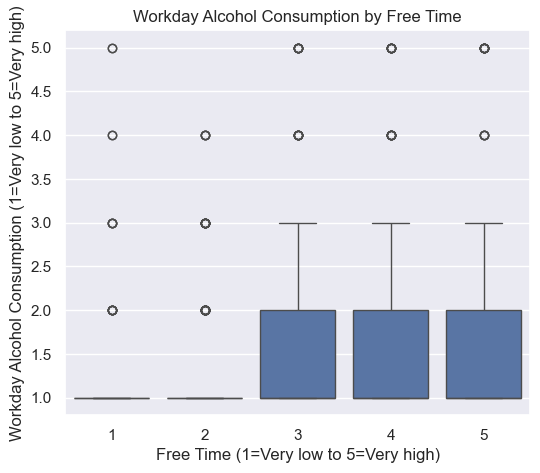

In [26]:
plt.figure(figsize=(6,5))
sns.boxplot(x='freetime', y='Dalc', data=combined_df)
plt.xlabel("Free Time (1=Very low to 5=Very high)")
plt.ylabel("Workday Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Workday Alcohol Consumption by Free Time")
plt.show()

From the results of the boxplot above, the upper whiskers of the students with more free time are at 3, while the median and lower whiskers for all are at 1. There is a presence of outliers of higher alcohol consumption across all levels of free time. The results suggest there is a moderate increase in alcohol consumption during workdays the higher the free time, however, the medians across all levels of free time are the same which suggests no strong relationship.

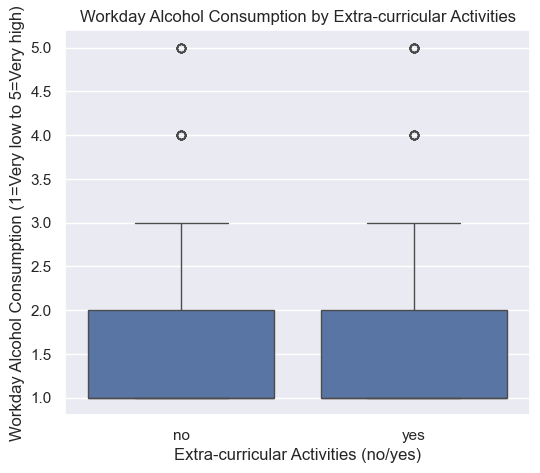

In [27]:
plt.figure(figsize=(6,5))
sns.boxplot(x='activities', y='Dalc', data=combined_df)
plt.xlabel("Extra-curricular Activities (no/yes)")
plt.ylabel("Workday Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Workday Alcohol Consumption by Extra-curricular Activities")
plt.show()

From the results of the boxplot above, the upper whiskers are at 3, the medians and lower whiskers are at 1, with a presence of outliers of higher alcohol consumption across both extra-curricular status. The results suggest that there is no strong relationship between extra-curricular activity status and workday alcohol consumption.

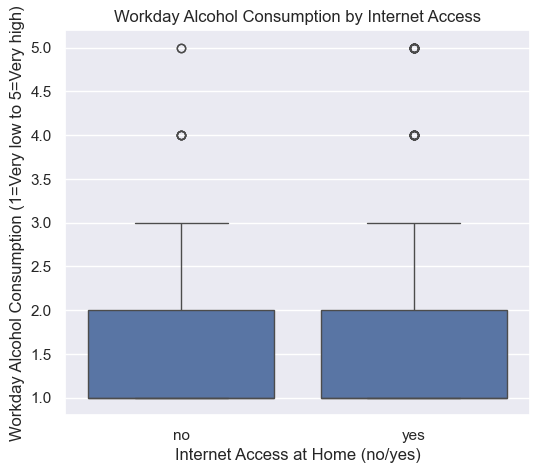

In [28]:
plt.figure(figsize=(6,5))
sns.boxplot(x='internet', y='Dalc', data=combined_df)
plt.xlabel("Internet Access at Home (no/yes)")
plt.ylabel("Workday Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Workday Alcohol Consumption by Internet Access")
plt.show()

From the results of the boxplot above, the upper whiskers are at 3, the medians and lower whiskers are at 1, with a presence of outliers of higher alcohol consumption across both internet status. The results suggest that there is no strong relationship between internet presence at home and workday alcohol consumption.

### Subquestion 3: Does family background relate to alcohol use?

We will be using multiple tests to examine if there is a linear relationship between variables related to family background and alcohol use. 

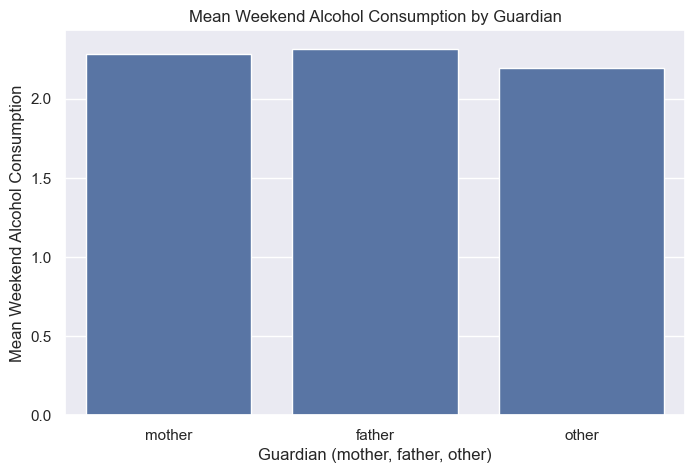

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x='guardian', y='Walc', data=combined_df, errorbar=None)
plt.xlabel("Guardian (mother, father, other)")
plt.ylabel("Mean Weekend Alcohol Consumption")
plt.title("Mean Weekend Alcohol Consumption by Guardian")
plt.show()

From the results of the barplot above, it can be observed that the means of student alcohol consumption are all slightly above 2.0, indicating moderate consumption across all kinds of guardians. This suggests that there is little to no influence by the primary guardian on workday alcohol consumption.

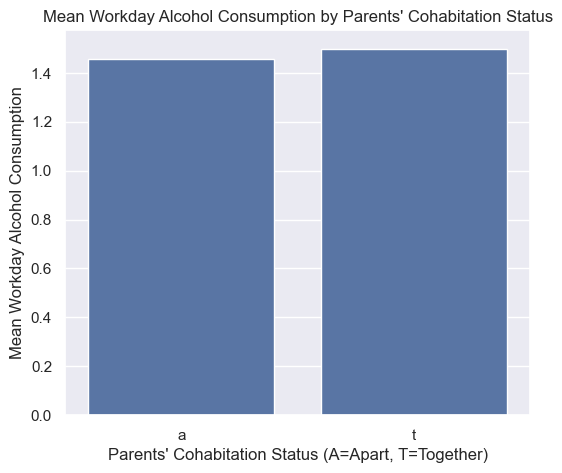

In [30]:
plt.figure(figsize=(6,5))
sns.barplot(x='Pstatus', y='Dalc', data=combined_df, errorbar=None)
plt.xlabel("Parents' Cohabitation Status (A=Apart, T=Together)")
plt.ylabel("Mean Workday Alcohol Consumption")
plt.title("Mean Workday Alcohol Consumption by Parents' Cohabitation Status")
plt.show()


From the results of the barplot above, it can be observed that the means of student alcohol consumption are all slightly above 1.4, indicating low alcohol consumption levels on both types of parental cohabitation status. This suggests that there is little to no influence by parents' cohabitation status on weekend alcohol consumption.

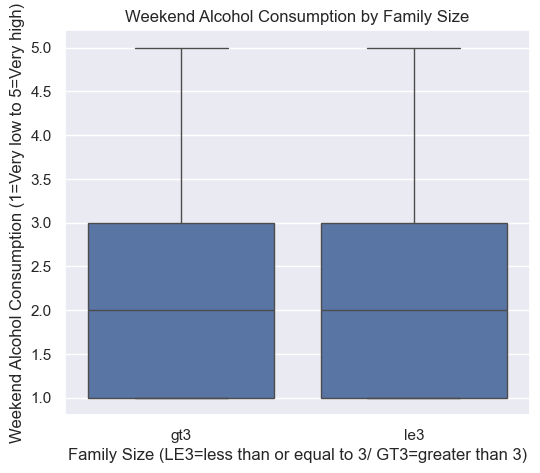

In [31]:
plt.figure(figsize=(6,5))
sns.boxplot(x='famsize', y='Walc', data=combined_df)
plt.xlabel("Family Size (LE3=less than or equal to 3/ GT3=greater than 3)")
plt.ylabel("Weekend Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Weekend Alcohol Consumption by Family Size")
plt.show()

From the results of the boxplot above, the upper and lower whiskers are both at 5 and 1 respectively and the medians and quartiles of both kinds of family sizes are exactly the same. The results suggest that there is little to no influence of the family size on the weekend alcohol consumption of the students.

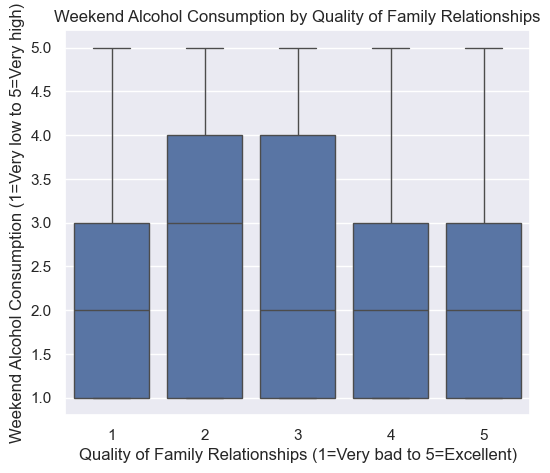

In [32]:
plt.figure(figsize=(6,5))
sns.boxplot(x='famrel', y='Walc', data=combined_df)
plt.xlabel("Quality of Family Relationships (1=Very bad to 5=Excellent)")
plt.ylabel("Weekend Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Weekend Alcohol Consumption by Quality of Family Relationships")
plt.show()

From the results of the boxplot above, the upper and lower whiskers are both at 5 and 1 respectively. The medians are all at 2 with an outlier at 3. There are no visible outliers on this boxplot. The quartiles suggest similar spread of alcohol consumption across all qualities of family relationship. The results suggest that there is little to no influence of the quality of family relationships on the weekend alcohol consumption of the students. 

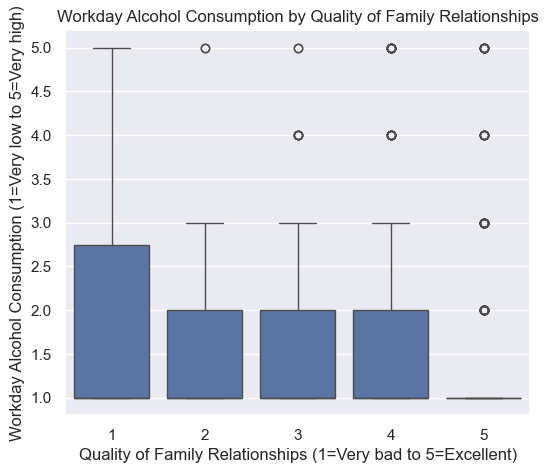

In [33]:
plt.figure(figsize=(6,5))
sns.boxplot(x='famrel', y='Dalc', data=combined_df)
plt.xlabel("Quality of Family Relationships (1=Very bad to 5=Excellent)")
plt.ylabel("Workday Alcohol Consumption (1=Very low to 5=Very high)")
plt.title("Workday Alcohol Consumption by Quality of Family Relationships")
plt.show()

From results of the boxplot above, the upper whiskers of the middle sections are all at 3 with a better quality of family relationships at 1 and the poorer quality of family relationships at 5. There results of these suggest that there is a possible inverse relationship between the quality of family relationships and workday alcohol consumption, where a better quality of family relationships suggest lower alcohol consumption and a poorer quality of family relationships suggest higher alcohol consumption.

### Exploratory Data Analysis Summary

Overall, the exploratory analysis reveals that weekend or workday alcohol consumption tends to be slightly higher among students who go out more frequently, study less, have poorer quality of family relationships, and have more free time, have more class failures. This suggests a direct relationship between social activity, class failures, and free time and alcohol consumption, and an inverse relationship between study time and quality of family relationships and alcohol consumption. However, no meaningful differences were observed in alcohol consumption based on the number of absences, romantic relationship status, internet access at home, extra-curricular activities, type of guardian, family size or parental cohabitation status. The findings suggests that alcohol use is more closely related to student behaviour patterns such as going out, free time, failures, or studying rather than and environment structure such as family background or relationship status, therefore partially supporting our general research question.

# Preprocessing
For the data mining and statistical inference section of the notebook, we'll first have to preprocess our current dataframe to ensure it is viable for the two sections. We will filter, one-hot encode, scale, and bin the dataframe.

### Filtering
We'll drop unused columns that were not used in our Exploratory Data Analysis.

In [34]:
selected_columns = [
    'Dalc', 'Walc', 'G3', 'studytime', 'failures', 'absences',
    'goout', 'freetime', 'famrel',
    'romantic', 'activities', 'internet', 'guardian', 'Pstatus', 'famsize'
]

filtered_df = combined_df[selected_columns].copy()
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Dalc        1044 non-null   int64 
 1   Walc        1044 non-null   int64 
 2   G3          1044 non-null   int64 
 3   studytime   1044 non-null   int64 
 4   failures    1044 non-null   int64 
 5   absences    1044 non-null   int64 
 6   goout       1044 non-null   int64 
 7   freetime    1044 non-null   int64 
 8   famrel      1044 non-null   int64 
 9   romantic    1044 non-null   object
 10  activities  1044 non-null   object
 11  internet    1044 non-null   object
 12  guardian    1044 non-null   object
 13  Pstatus     1044 non-null   object
 14  famsize     1044 non-null   object
dtypes: int64(9), object(6)
memory usage: 122.5+ KB
None


### One-hot Encoding
We need to convert the categorical data types to numerical for use in K-means clustering.

In [35]:
categorical_cols = ['romantic', 'activities', 'internet', 'Pstatus', 'famsize']
encoded_df = pd.get_dummies(filtered_df, columns = categorical_cols, drop_first = True)

guardian_dummies = pd.get_dummies(encoded_df['guardian'], prefix='guardian')
encoded_df = encoded_df.join(guardian_dummies).drop('guardian', axis=1)

encoded_df = encoded_df.astype(int)
print(encoded_df.head())

   Dalc  Walc  G3  studytime  failures  absences  goout  freetime  famrel  \
0     1     1   6          2         0         6      4         3       4   
1     1     1   6          2         0         4      3         3       5   
2     2     3  10          2         4        10      2         3       4   
3     1     1  15          3         0         2      2         2       3   
4     1     2  10          2         0         4      2         3       4   

   romantic_yes  activities_yes  internet_yes  Pstatus_t  famsize_le3  \
0             0               0             0          0            0   
1             0               0             1          1            0   
2             0               0             1          1            1   
3             1               1             1          1            0   
4             0               0             0          1            0   

   guardian_father  guardian_mother  guardian_other  
0                0                1         

Now, we have properly one-hot encoded the binary categorical features of romantic, acitivities, internet, and famsize. The guardian feature was also handled by giving a separate column for the three categories of the guardian feature. Next is scaling the other numerical features. 

### Scaling
There are presense of outliers in the remaining numerical features which were seen during the visualisation with the EDA. We will be using robust scaler in order to mitigate that.

In [36]:
from sklearn.preprocessing import RobustScaler

In [37]:
numeric_cols = ['Dalc', 'Walc', 'G3', 'studytime', 'failures', 'absences', 'goout', 'freetime', 'famrel']

scaler = RobustScaler()
scaled_encoded_df = encoded_df.copy()
scaled_encoded_df[numeric_cols] = scaler.fit_transform(encoded_df[numeric_cols])

scaled_encoded_df.head()

,Dalc,Walc,G3,studytime,failures,absences,goout,freetime,famrel,romantic_yes,activities_yes,internet_yes,Pstatus_t,famsize_le3,guardian_father,guardian_mother,guardian_other
0,0.0,-0.5,-1.25,0.0,0.0,0.666667,0.5,0.0,0.0,0,0,0,0,0,0,1,0
1,0.0,-0.5,-1.25,0.0,0.0,0.333333,0.0,0.0,1.0,0,0,1,1,0,1,0,0
2,1.0,0.5,-0.25,0.0,4.0,1.333333,-0.5,0.0,0.0,0,0,1,1,1,0,1,0
3,0.0,-0.5,1.00,1.0,0.0,0.000000,-0.5,-1.0,-1.0,1,1,1,1,0,0,1,0
4,0.0,0.0,-0.25,0.0,0.0,0.333333,-0.5,0.0,0.0,0,0,0,1,0,1,0,0


Now, we have properly scaled the remaining numerical features of Dalc, Walc, G3, studytime, failures, absences, goout, freetime, and famrel. This scaled and encoded dataframe is now ready for K-means clustering. Next is binning for the final preprocessing.

### Binning
Categorical features are needed for the chi-square tests so we need to bin the numerical features into categories.

In [38]:
binned_df = filtered_df.copy()

one_five_bins = [0, 2, 3, 5]
g3_bins = [-1, 9, 14, 20]
studytime_bins = [0, 2, 4]
absences_bins = [-1, 5, 15, 93]

low_med_hi_labels = ['Low', 'Medium', 'High']
low_hi_labels = ['Low', 'High']
famrel_labels = ['Poor', 'Average', 'Good']

binned_df['Dalc_binned'] = pd.cut(binned_df['Dalc'], bins=one_five_bins, labels=low_med_hi_labels, include_lowest=True)
binned_df['Walc_binned'] = pd.cut(binned_df['Walc'], bins=one_five_bins, labels=low_med_hi_labels, include_lowest=True)
binned_df['G3_binned'] = pd.cut(binned_df['G3'], bins=g3_bins, labels=low_med_hi_labels, include_lowest=True)
binned_df['studytime_binned'] = pd.cut(binned_df['studytime'], bins=studytime_bins, labels=low_hi_labels, include_lowest=True)
binned_df['failures_binned'] = binned_df['failures'].apply(lambda x: '3+' if x == 4 else str(x))
binned_df['absences_binned'] = pd.cut(binned_df['absences'], bins=absences_bins, labels=low_med_hi_labels, include_lowest=True)
binned_df['goout_binned'] = pd.cut(binned_df['goout'], bins=one_five_bins, labels=low_med_hi_labels, include_lowest=True)
binned_df['freetime_binned'] = pd.cut(binned_df['freetime'], bins=one_five_bins, labels=low_med_hi_labels, include_lowest=True)
binned_df['famrel_binned'] = pd.cut(binned_df['famrel'], bins=one_five_bins, labels=famrel_labels, include_lowest=True)

numerical_cols = ['Dalc', 'Walc', 'G3', 'studytime', 'failures', 'absences', 'goout', 'freetime', 'famrel']
binned_df = binned_df.drop(columns=numerical_cols)
print(binned_df.head())

  romantic activities internet guardian Pstatus famsize Dalc_binned  \
0       no         no       no   mother       a     gt3         Low   
1       no         no      yes   father       t     gt3         Low   
2       no         no      yes   mother       t     le3         Low   
3      yes        yes      yes   mother       t     gt3         Low   
4       no         no       no   father       t     gt3         Low   

  Walc_binned G3_binned studytime_binned failures_binned absences_binned  \
0         Low       Low              Low               0          Medium   
1         Low       Low              Low               0             Low   
2      Medium    Medium              Low              3+          Medium   
3         Low      High             High               0             Low   
4         Low    Medium              Low               0             Low   

  goout_binned freetime_binned famrel_binned  
0         High          Medium          Good  
1       Medium        

Now, we have properly binned the remaining numerical features of Dalc, Walc, G3, studytime, failures, absences, goout, freetime, and famrel. This binned dataframe is now ready for Chi-square tests. Next are the data mining tests.

# Data Mining

## K-means Clustering
For our data mining section, we will be using the previously preprocessed scaled_encoded_df for use in K-means clustering. We use this particular method to find and group similar data points together in order to reveal a pattern with our data. Similar to the way we divided features with the EDA, clustering it based on academic, behavioural and socio-economic features.

In [39]:
from kmeans import KMeans
from sklearn.decomposition import PCA

In [40]:
clustered_df = scaled_encoded_df.copy()

academic_features = ['studytime', 'absences', 'failures', 'G3']
behavioural_features = ['goout', 'freetime', 'romantic_yes', 'activities_yes', 'internet_yes']
socioeconomic_features = ['famrel', 'Pstatus_t', 'famsize_le3', 'guardian_father', 'guardian_mother', 'guardian_other']

academic_s_e_df = clustered_df[academic_features]
behavioral_s_e_df = clustered_df[behavioural_features]
socioeconomic_s_e_df = clustered_df[socioeconomic_features]

### Academic Clusters

In [41]:
kmeans_academic = KMeans(3, 0, len(academic_s_e_df.columns), 1044, academic_s_e_df)
kmeans_academic.initialize_centroids(academic_s_e_df)
academic_clusters = kmeans_academic.train(academic_s_e_df, 50)
clustered_df['academic_cluster'] = academic_clusters

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Done clustering!


c:\Users\Vaughn Sy\Desktop\DLSU\DLSU_ACAD\CSMODEL\kmeans.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


In [42]:
print('Academic Cluster number of data points in each cluster:')
print('Cluster 0: ', academic_clusters.loc[academic_clusters == 0].shape[0])
print('Cluster 1: ', academic_clusters.loc[academic_clusters == 1].shape[0])
print('Cluster 2: ', academic_clusters.loc[academic_clusters == 2].shape[0])

Academic Cluster number of data points in each cluster:
Cluster 0:  802
Cluster 1:  121
Cluster 2:  121


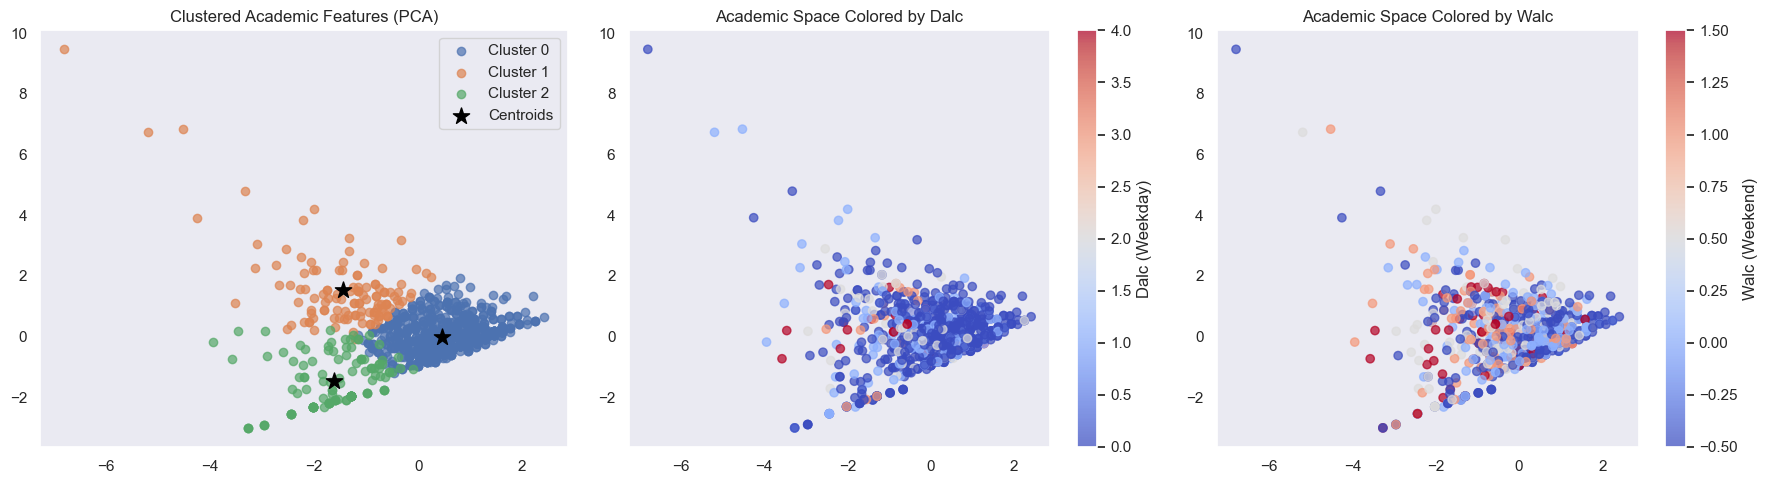

In [43]:
pca = PCA(n_components=2)
academic_2d_df = pca.fit_transform(academic_s_e_df)

academic_2d_df = pd.DataFrame(academic_2d_df, columns=['x', 'y'])
academic_2d_df['cluster'] = academic_clusters
academic_2d_df['Dalc'] = clustered_df['Dalc']
academic_2d_df['Walc'] = clustered_df['Walc']

centroids = academic_2d_df.groupby('cluster')[['x', 'y']].mean().reset_index()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for label in sorted(academic_2d_df['cluster'].unique()):
    subset = academic_2d_df[academic_2d_df['cluster'] == label]
    axs[0].scatter(subset['x'], subset['y'], label=f'Cluster {label}', alpha=0.7)

axs[0].scatter(
    centroids['x'], centroids['y'],
    c='black', marker='*', s=150, label='Centroids'
)
axs[0].set_title("Clustered Academic Features (PCA)")
axs[0].legend()
axs[0].grid()

sc1 = axs[1].scatter(
    academic_2d_df['x'],
    academic_2d_df['y'],
    c=academic_2d_df['Dalc'],
    cmap='coolwarm',
    alpha=0.7
)
axs[1].set_title('Academic Space Colored by Dalc')
axs[1].grid()
plt.colorbar(sc1, ax=axs[1], label='Dalc (Weekday)')

sc2 = axs[2].scatter(
    academic_2d_df['x'],
    academic_2d_df['y'],
    c=academic_2d_df['Walc'],
    cmap='coolwarm',
    alpha=0.7
)
axs[2].set_title('Academic Space Colored by Walc')
axs[2].grid()
plt.colorbar(sc2, ax=axs[2], label='Walc (Weekend)')

plt.tight_layout()
plt.show()

Cluster grouping and support reveals that academic performance may correlate in such a way that there is a mild inverse relationship academic performance and weekend drinking, but has little relationship with weekday drinking. Cluster 0 is so large that it influences the patterns of clusters the most, with clusters 1 and 2 showing slightly higher weekend drinking. 

### Behavioural Clusters


In [44]:
kmeans_behavioural = KMeans(3, 0, len(behavioral_s_e_df.columns), 1044, behavioral_s_e_df)
kmeans_behavioural.initialize_centroids(behavioral_s_e_df)
behavioural_clusters = kmeans_behavioural.train(behavioral_s_e_df, 50)
clustered_df['behavioural_cluster'] = behavioural_clusters

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Done clustering!


c:\Users\Vaughn Sy\Desktop\DLSU\DLSU_ACAD\CSMODEL\kmeans.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


In [45]:
print('Behavioural Cluster number of data points in each cluster:')
print('Cluster 0: ', behavioural_clusters.loc[behavioural_clusters == 0].shape[0])
print('Cluster 1: ', behavioural_clusters.loc[behavioural_clusters == 1].shape[0])
print('Cluster 2: ', behavioural_clusters.loc[behavioural_clusters == 2].shape[0])

Behavioural Cluster number of data points in each cluster:
Cluster 0:  408
Cluster 1:  401
Cluster 2:  235


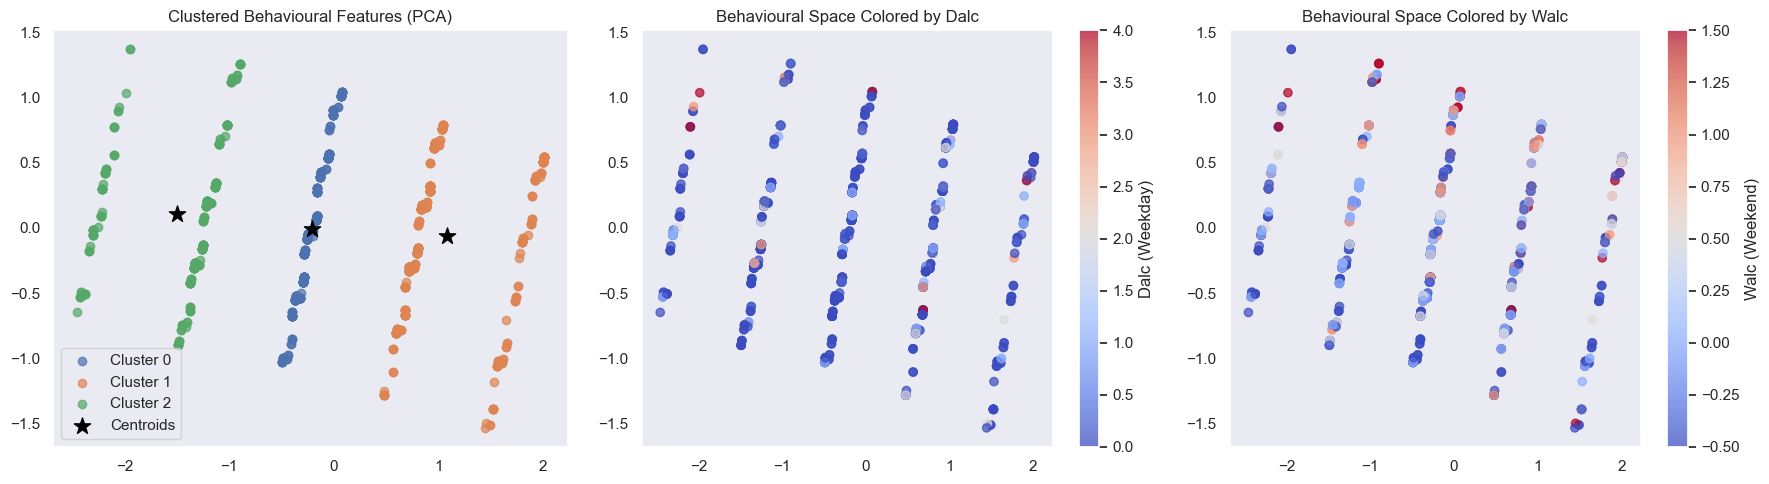

In [46]:
pca = PCA(n_components=2)
behavioural_2d_df = pca.fit_transform(behavioral_s_e_df)

behavioural_2d_df = pd.DataFrame(behavioural_2d_df, columns=['x', 'y'])
behavioural_2d_df['cluster'] = behavioural_clusters
behavioural_2d_df['Dalc'] = clustered_df['Dalc']
behavioural_2d_df['Walc'] = clustered_df['Walc']

centroids = behavioural_2d_df.groupby('cluster')[['x', 'y']].mean().reset_index()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for label in sorted(behavioural_2d_df['cluster'].unique()):
    subset = behavioural_2d_df[behavioural_2d_df['cluster'] == label]
    axs[0].scatter(subset['x'], subset['y'], label=f'Cluster {label}', alpha=0.7)

axs[0].scatter(
    centroids['x'], centroids['y'],
    c='black', marker='*', s=150, label='Centroids'
)
axs[0].set_title("Clustered Behavioural Features (PCA)")
axs[0].legend()
axs[0].grid()

sc1 = axs[1].scatter(
    behavioural_2d_df['x'],
    behavioural_2d_df['y'],
    c=behavioural_2d_df['Dalc'],
    cmap='coolwarm',
    alpha=0.7
)
axs[1].set_title('Behavioural Space Colored by Dalc')
axs[1].grid()
plt.colorbar(sc1, ax=axs[1], label='Dalc (Weekday)')

sc2 = axs[2].scatter(
    behavioural_2d_df['x'],
    behavioural_2d_df['y'],
    c=behavioural_2d_df['Walc'],
    cmap='coolwarm',
    alpha=0.7
)
axs[2].set_title('Behavioural Space Colored by Walc')
axs[2].grid()
plt.colorbar(sc2, ax=axs[2], label='Walc (Weekend)')

plt.tight_layout()
plt.show()

Cluster grouping and support reveals that behavioural factors show more variation in alcohol use due to the support being evenly distributed and the space between clusters well separated. This suggests a stronger relationship between behaviour and drinking, such that clusters 1 and 2 tend to consume more alcohol especially on weekends.

### Socio-economic Clusters

In [47]:
kmeans_socioeconomic = KMeans(3, 0, len(socioeconomic_s_e_df.columns), 1044, socioeconomic_s_e_df)
kmeans_socioeconomic.initialize_centroids(socioeconomic_s_e_df)
socioeconomic_clusters = kmeans_socioeconomic.train(socioeconomic_s_e_df, 50)
clustered_df['socioeconomic_cluster'] = socioeconomic_clusters

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Done clustering!


c:\Users\Vaughn Sy\Desktop\DLSU\DLSU_ACAD\CSMODEL\kmeans.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


In [48]:
print('Socio-econmic Cluster number of data points in each cluster:')
print('Cluster 0: ', socioeconomic_clusters.loc[socioeconomic_clusters == 0].shape[0])
print('Cluster 1: ', socioeconomic_clusters.loc[socioeconomic_clusters == 1].shape[0])
print('Cluster 2: ', socioeconomic_clusters.loc[socioeconomic_clusters == 2].shape[0])

Socio-econmic Cluster number of data points in each cluster:
Cluster 0:  645
Cluster 1:  77
Cluster 2:  322


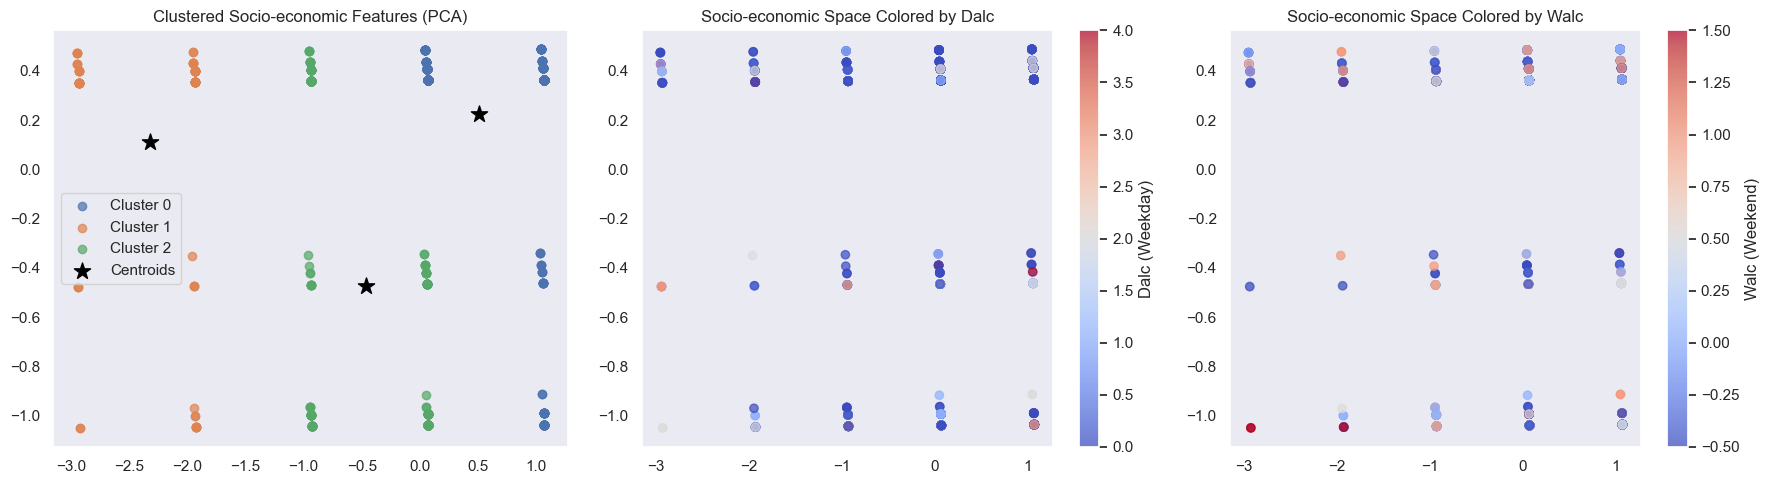

In [49]:
pca = PCA(n_components=2)
socioeconomic_2d_df = pca.fit_transform(socioeconomic_s_e_df)

socioeconomic_2d_df = pd.DataFrame(socioeconomic_2d_df, columns=['x', 'y'])
socioeconomic_2d_df['cluster'] = socioeconomic_clusters
socioeconomic_2d_df['Dalc'] = clustered_df['Dalc']
socioeconomic_2d_df['Walc'] = clustered_df['Walc']

centroids = socioeconomic_2d_df.groupby('cluster')[['x', 'y']].mean().reset_index()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for label in sorted(socioeconomic_2d_df['cluster'].unique()):
    subset = socioeconomic_2d_df[socioeconomic_2d_df['cluster'] == label]
    axs[0].scatter(subset['x'], subset['y'], label=f'Cluster {label}', alpha=0.7)

axs[0].scatter(
    centroids['x'], centroids['y'],
    c='black', marker='*', s=150, label='Centroids'
)
axs[0].set_title("Clustered Socio-economic Features (PCA)")
axs[0].legend()
axs[0].grid()

sc1 = axs[1].scatter(
    socioeconomic_2d_df['x'],
    socioeconomic_2d_df['y'],
    c=socioeconomic_2d_df['Dalc'],
    cmap='coolwarm',
    alpha=0.7
)
axs[1].set_title('Socio-economic Space Colored by Dalc')
axs[1].grid()
plt.colorbar(sc1, ax=axs[1], label='Dalc (Weekday)')

sc2 = axs[2].scatter(
    socioeconomic_2d_df['x'],
    socioeconomic_2d_df['y'],
    c=socioeconomic_2d_df['Walc'],
    cmap='coolwarm',
    alpha=0.7
)
axs[2].set_title('Socio-economic Space Colored by Walc')
axs[2].grid()
plt.colorbar(sc2, ax=axs[2], label='Walc (Weekend)')

plt.tight_layout()
plt.show()

Cluster grouping and support reveal that cluster 0 is the dominant one despite the clear separation between clusters. There are a few outliers across alcohol usage but overall there are no clear differences in the alcohol usage among the clusters, suggesting that socio-economic background has a weak relationship on alcohol usage. 

# Statistical Inference
This section is important as it is the basis whether insights in the exploratory data analysis and data mining are statistically significant, making the conclusions drawn more reliable and evidence based. We need to determine which statistical tests to apply to the features of the dataframe, normality and variance affects which tests should be done. Step by step process will be shown below.

In [50]:
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import kruskal
from scipy.stats import spearmanr
import statsmodels.api as sm

## Inference 1: Weekend Alcohol Usage vs Study Time
We will examine whether weekend alcohol consumption (walc) differs across study time levels (studytime). This explores whether students who study more tend to consume less alcohol on weekends which is a pattern observed during exploratory data analysis and data mining.

**Null Hypothesis (H₀)**: There is no significant difference in weekend alcohol consumption across studytime groups.  

**Alternative Hypothesis (H₁)**: At least one studytime group has a different level of weekend alcohol consumption.

Using the filtered dataframe which keeps the original values of the walc and studytime features. We first test for normality and variance which helps us decide which statistical test to use for these two features.


In [51]:
for level in sorted(filtered_df['studytime'].unique()):
    data = filtered_df[filtered_df['studytime'] == level]['Walc']
    stat, p = shapiro(data)
    print(f"Studytime {level} — W={stat:.4f}, p={p:.4f}")

Studytime 1 — W=0.8825, p=0.0000
Studytime 2 — W=0.8428, p=0.0000
Studytime 3 — W=0.7908, p=0.0000
Studytime 4 — W=0.6879, p=0.0000


In [52]:
grouped = [filtered_df[filtered_df['studytime'] == level]['Walc'] for level in sorted(filtered_df['studytime'].unique())]
stat, p = levene(*grouped)
print(f"Levene’s Test — W={stat:.4f}, p={p:.4f}")

Levene’s Test — W=11.3389, p=0.0000


The Shapiro-Wilk and Levene's Test both use the p-value to determine if the features are normally distributed and the variances are equal, if the p-value is less than 0.05 then it is non-normally distributed and the variances are unequal respectively. 
The tests yielded all studytime groups to be non-normally distributed and the variances across the studytime groups to be unequal. We will instead use the Kruskal-Wallis test to find out if study time is statistically significant to weekend alcohol usage.

In [53]:
stat, p = kruskal(*grouped)
print(f"Kruskal-Wallis — H={stat:.4f}, p={p:.4f}")

Kruskal-Wallis — H=58.6862, p=0.0000


Based on the test result above, since the p-value is below 0.05, we reject the null hypothesis. There is enough evidence to say that at least one study time group statistically differs significantly to the level of weekend alcohol consumption compared to others. 

## Inference 2: Weekend Alcohol Usage vs Number of Past Class Failures
We will examine whether weekend alcohol consumption (walc) differs across past class failures levels (failures). This explores whether students who study more tend to consume more alcohol on weekends which is a pattern observed during exploratory data analysis and data mining.

**Null Hypothesis (H₀)**: There is no monotonic correlation between the number of past class failures and weekend alcohol consumption.

**Alternative Hypothesis (H₁)**: There is a significant monotonic correlation between the number of past class failures and weekend alcohol consumption.

Using the filtered dataframe which keeps the original values of the walc and failures features. We first test for monotonicity which helps us decide which statistical test to use for these two features.

c:\Users\Vaughn Sy\Desktop\DLSU\DLSU_ACAD\CSMODEL\.venv\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


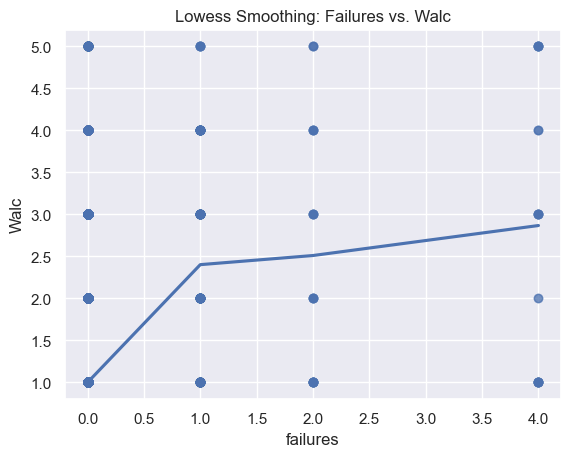

In [54]:
sns.regplot(data=filtered_df, x='failures', y='Walc', lowess=True, scatter_kws={'alpha':0.5})
plt.title("Lowess Smoothing: Failures vs. Walc")
plt.show()

The LOWESS scatterplot showed that as failures increased so did weekend alcohol consumption. The line only increasing for both features means that Spearman's Rank Correlation to find out if past class failures is statistically significant to weekend alcohol consumption.

In [55]:
rho, p = spearmanr(filtered_df['failures'], filtered_df['Walc'])
print(f"Spearman's ρ = {rho:.4f}, p = {p:.4f}")

Spearman's ρ = 0.0906, p = 0.0034


Based on the test result above, since the p-value is below 0.05 but Spearman's p is close to 0, we reject the null hypothesis. There is enough evidence to say that there is a statistically significant but very weak positive monotonic correlation between the number of past class failures and weekend alcohol consumption. This suggests that the more past failures a student has the higher their weekend alcohol consumption.

## Inference 3: Weekened Alcohol Usage vs Going Out
We will examine whether weekend alcohol consumption (walc) differs across going out with friends levels (goout). This explores whether students who go out with friends more tend to consume more alcohol on weekends which is a pattern observed during exploratory data analysis and data mining.

**Null Hypothesis (H₀)**: There is no significant difference in weekend alcohol consumption across different levels of going out with friends.  

**Alternative Hypothesis (H₁)**: There is a significant difference in weekend alcohol consumption across different levels of going out with friends.

Using the filtered dataframe which keeps the original values of the walc and goout features. We first test for normality and variance which helps us decide which statistical test to use for these two features.

In [56]:
for level in sorted(filtered_df['goout'].unique()):
    data = filtered_df[filtered_df['goout'] == level]['Walc']
    stat, p = shapiro(data)
    print(f"Going out with friends {level} — W={stat:.4f}, p={p:.4f}")

Going out with friends 1 — W=0.6441, p=0.0000
Going out with friends 2 — W=0.7604, p=0.0000
Going out with friends 3 — W=0.8498, p=0.0000
Going out with friends 4 — W=0.8708, p=0.0000
Going out with friends 5 — W=0.8718, p=0.0000


In [57]:
grouped = [filtered_df[filtered_df['goout'] == level]['Walc'] for level in sorted(filtered_df['goout'].unique())]
stat, p = levene(*grouped)
print(f"Levene’s Test — W={stat:.4f}, p={p:.4f}")

Levene’s Test — W=16.8700, p=0.0000


The Shapiro-Wilk and Levene's Test both use the p-value to determine if the features are normally distributed and the variances are equal, if the p-value is less than 0.05 then it is non-normally distributed and the variances are unequal respectively. The tests yielded all going out with friends levels to be non-normally distributed and the variances across the going out with friends levels to be unequal. We will instead use the Kruskal-Wallis test to find out if going out with friends is statistically significant to weekend alcohol usage.

In [58]:
stat, p = kruskal(*grouped)
print(f"Kruskal-Wallis — H={stat:.4f}, p={p:.4f}")

Kruskal-Wallis — H=154.2114, p=0.0000


Based on the test result above, since the p-value is below 0.05, we reject the null hypothesis. There is enough evidence to say that there is a statistically significant difference in weekend alcohol consumption and going out with friends level. This suggests that the more students go out with friends the more they consume alcohol on the weekends.

## Inference 4: Weekend Alcohol Usage vs Free Time
We examine whether weekend alcohol consumption (Walc) differs significantly across different levels of free time (freetime). This explores whether students with more leisure time tend to consume more alcohol on weekends which is a pattern that observed during exploratory data analysis and data mining.

**Null Hypothesis (H₀)**: There is no significant difference in weekend alcohol consumption across different levels of free time.

**Alternative Hypothesis (H₁)**: There is a significant difference in weekend alcohol consumption across different levels of free time.

Using the filtered dataframe which keeps the original values of the walc and freetime features. We first test for normality and variance which helps us decide which statistical test to use for these two features.

In [59]:
for level in sorted(filtered_df['freetime'].unique()):
    data = filtered_df[filtered_df['freetime'] == level]['Walc']
    stat, p = shapiro(data)
    print(f"Free time {level} — W={stat:.4f}, p={p:.4f}")

Free time 1 — W=0.7261, p=0.0000
Free time 2 — W=0.8384, p=0.0000
Free time 3 — W=0.8280, p=0.0000
Free time 4 — W=0.8604, p=0.0000
Free time 5 — W=0.8588, p=0.0000


In [60]:
grouped = [filtered_df[filtered_df['freetime'] == level]['Walc'] for level in sorted(filtered_df['freetime'].unique())]
stat, p = levene(*grouped)
print(f"Levene’s Test — W={stat:.4f}, p={p:.4f}")

Levene’s Test — W=6.3302, p=0.0000


The Shapiro-Wilk and Levene's Test both use the p-value to determine if the features are normally distributed and the variances are equal, if the p-value is less than 0.05 then it is non-normally distributed and the variances are unequal respectively. The tests yielded all free time levels to be non-normally distributed and the variances across the free time levels to be unequal. We will instead use the Kruskal-Wallis test to find out if free time is statistically significant to weekend alcohol usage.

In [61]:
stat, p = kruskal(*grouped)
print(f"Kruskal-Wallis — H={stat:.4f}, p={p:.4f}")

Kruskal-Wallis — H=20.2076, p=0.0005


Based on the test result above, since the p-value is below 0.05, we reject the null hypothesis. There is enough evidence to say that there is a statistically significant difference in weekend alcohol consumption and free time level. This suggests that the more free time the student has the more they consume alcohol on the weekends.

## Inference 5: Weekend Alcohol Usage vs Extra-Curricular Activities
We examine whether weekend alcohol consumption (Walc) differs between students who do and do not participate in extra-curricular activities. This explores whether involvement in structured extra-curricilar activities has any relationship with weekend alcohol usage which is a pattern that may support behavioral trends observed during exploratory data analysis and data mining.

**Null Hypothesis (H₀)**: There is no significant difference in weekend alcohol consumption between students who participate in extra-curricular activities and those who do not.

**Alternative Hypothesis (H₁)**: There is a significant difference in weekend alcohol consumption between students who participate in extra-curricular activities and those who do not.

Using the encoded dataframe which keeps the original values of walc but encoded activities into binary.

In [63]:
from scipy.stats import mannwhitneyu

group_yes = encoded_df[encoded_df['activities_yes'] == 1]['Walc']
group_no = encoded_df[encoded_df['activities_yes'] == 0]['Walc']
stat, p = mannwhitneyu(group_yes, group_no, alternative='two-sided')
print(f"Mann-Whitney U — U={stat:.4f}, p={p:.4f}")

Mann-Whitney U — U=134463.5000, p=0.7069


Based on the test result above, since the p-value is above 0.05, we fail to reject the null hypothesis. There is not enough evidence to say that there is a statistically significant difference in weekend alcohol consumption and extra-curricular activities participation. This suggests that extra-curricular activity participation is not associated with changes in weekend alcohol consumption.

## Inference 6: Weekend Alcohol Usage vs Quality of Family Relationships
We examine whether weekend alcohol consumption (Walc) differs significantly across different levels of family relationship quality (famrel). This explores whether the quality of family relationships is associated with students' weekend drinking behavior which is a pattern observed during exploratory data analysis.

**Null Hypothesis (H₀)**: There is no significant difference in weekend alcohol consumption across levels of family relationship quality.

**Alternative Hypothesis (H₁)**: There is a significant difference in weekend alcohol consumption across levels of family relationship quality.

Using the filtered dataframe which keeps the original values of the walc and famrel features. We first test for normality and variance which helps us decide which statistical test to use for these two features.

In [64]:
for level in sorted(filtered_df['famrel'].unique()):
    data = filtered_df[filtered_df['famrel'] == level]['Walc']
    stat, p = shapiro(data)
    print(f"Quality of Family Relationships {level} — W={stat:.4f}, p={p:.4f}")

Quality of Family Relationships 1 — W=0.8077, p=0.0001
Quality of Family Relationships 2 — W=0.8646, p=0.0001
Quality of Family Relationships 3 — W=0.8793, p=0.0000
Quality of Family Relationships 4 — W=0.8468, p=0.0000
Quality of Family Relationships 5 — W=0.8120, p=0.0000


In [65]:
grouped = [filtered_df[filtered_df['famrel'] == level]['Walc'] for level in sorted(filtered_df['famrel'].unique())]
stat, p = levene(*grouped)
print(f"Levene’s Test — W={stat:.4f}, p={p:.4f}")

Levene’s Test — W=1.0624, p=0.3739


The Shapiro-Wilk and Levene's Test both use the p-value to determine if the features are normally distributed and the variances are equal, if the p-value is less than 0.05 then it is non-normally distributed and the variances are unequal respectively. The tests yielded all quality of family relationship levels to be non-normally distributed but the variances across the quality of family relationship levels to be equal. We will instead use the Kruskal-Wallis test to find out if quality of family relationships is statistically significant to weekend alcohol usage.

In [66]:
stat, p = kruskal(*grouped)
print(f"Kruskal-Wallis — H={stat:.4f}, p={p:.4f}")

Kruskal-Wallis — H=13.1106, p=0.0107


Based on the test result above, since the p-value is below 0.05, we reject the null hypothesis. There is enough evidence to say that there is a statistically significant difference in weekend alcohol consumption and quality of family relationships level. This suggests that the poorer quality of family relationship student has the more they consume alcohol on the weekends.

# Insights & Conclusions

## General Research Question
### - How do academic, behavioral, and socioeconomic factors influence alcohol consumption?

## Behavioural Factors
Behavioural traits are the stronger predictors of alcohol use, particularly in the weekends. Exploratory Data Analysis, Data Mining, and Statistical Inferences all point to various behavioural factors such as going out with friends and more free time tend to have higher alcohol consumption. EDA visualisations show that in general, behavioural factors that are more sociable in nature have higher alcohol consumption. K-means clustering also support this with clusters 1 and 2 having a tendency to have higher alcohol consumption on weekends. Statistical inferences showed that going out with friends and free time are statistically significant to alcohol consumption but extra-curricular activities were found to not be statistically significant. 

## Academic Factors
Academic reasons are mild predictors of alcohol use, particularly in the weekends. Exploratory Data Analysis, Data Mining, and Statistical Inferences all point to various academic factors such as number of past class failures having a direct relationship and lower study time having an inverse relationship to alcohol consumption. EDA visualisations also show that in general, academic factors that indicate poorer academic performance have higher consumption. K-means clustering show that the majority of students in cluster 0 have lower alcohol consumption. Statistical inferences showed that study time and number of past class failures are statistically significant to alcohol consumption, however, there is only a weak positive correlation between number of past class failures and alcohol consumption.

## Socioeconomic Factors
Socioeconomic characteristics are weak or not predictors of alcohol use. Exploratory Data Analysis, Data Mining, and Statistical Inferences all point to various socioeconomic factors not having a significant influence on alcohol consumption. EDA visualisations showed little to no patterns and generally weaker alcohol consumption compared to behavioural and academic factors. K-means clustering also show that the clusters were uneven. Statistical inferences showed that the quality of family relationships are not statistically significant to alcohol consumption.

## Conclusion
This findings show that behavioural factors are the strongest predictors of alcohol consumption. The more socially active a person is the more they are likely to consume more alcohol. Academic factors have a mild and inverse relationship with alcohol, such that poorer performers consume more alcohol. Socioeconomic factors appear to not play a big role in influencing alcohol consumption. In conclusion, it is behavioural and academic factors that meaningfully influence alcohol consumption among students.